Imports for the Project

In [1]:
import scipy.io as io
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Load The data

In [2]:
data = io.loadmat("WLDataCW.mat")

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Jan 21 21:10:34 2022',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[[ 3.64516091e+00, -1.22507811e+00,  8.41415691e+00, ...,
          -1.16731644e+01,  2.65084229e+01,  4.00945067e-01],
         [ 1.57700694e+00,  2.68786597e+00,  2.37991428e+00, ...,
          -9.80385399e+00,  2.95700607e+01,  1.86778176e+00],
         [-2.88467383e+00,  3.47892046e+00, -3.33852053e+00, ...,
          -7.33824921e+00,  3.09278240e+01,  2.78261375e+00],
         ...,
         [ 6.32441854e+00,  7.38758564e+00, -5.30264425e+00, ...,
           2.92871971e+01, -2.80428171e-01, -4.32558784e+01],
         [-5.14494121e-01,  1.25400152e+01, -2.38987041e+00, ...,
           2.50036125e+01, -1.41281223e+00, -3.64643059e+01],
         [-3.36245584e+00,  1.25796471e+01,  1.27706754e+00, ...,
           2.42137814e+01, -1.03876221e+00, -3.15475597e+01]],
 
        [[ 1.40172338e+01,  6.67675018e+00,  1.04504976e+01, ...,
   

Pre process and Reshape the Data

In [4]:
X = data['data']

In [5]:
X.shape

(62, 512, 360)

In [6]:
X = np.transpose(X)

In [7]:
X.shape

(360, 512, 62)

In [8]:
y = data['label']

In [9]:
y.shape

(1, 360)

In [10]:
y= np.transpose(y)

In [11]:
y.shape

(360, 1)

In [12]:
len(X)

360

In [13]:
len(y)

360

In [14]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

Applying Standard Scaler to convert data values into standard values

In [15]:
scaler=StandardScaler()
X_transform = scaler.fit_transform(X.reshape(-1,X.shape[-1])).reshape(X.shape)

In [16]:
X_transform.shape

(360, 512, 62)

In [17]:
X_transform

array([[[ 1.61168098e-01,  6.91580951e-01,  1.01101410e+00, ...,
          3.63649577e-01,  4.69384611e-01,  4.90507603e-01],
        [ 6.83511198e-02,  4.72435027e-01,  8.26347291e-01, ...,
          4.88638610e-01,  7.89436162e-01,  6.16748370e-02],
        [-1.31885305e-01, -3.81155685e-02,  3.85388657e-02, ...,
          2.59739589e-02,  8.33745658e-01, -4.44903523e-01],
        ...,
        [ 2.81410903e-01,  3.90077144e-01,  9.60153878e-01, ...,
          9.59591985e-01,  7.88507223e-01,  6.41800880e-01],
        [-2.55136658e-02,  2.00144455e-01,  5.48959196e-01, ...,
          1.62426090e+00,  9.51273441e-01,  1.24910390e+00],
        [-1.53327763e-01,  1.77725226e-01,  3.80270481e-01, ...,
          2.31522655e+00,  1.13026845e+00,  1.77145636e+00]],

       [[-5.74040674e-02,  3.29603553e-01,  6.72693014e-01, ...,
          2.55452776e+00,  1.37332726e+00,  1.62554085e+00],
        [ 1.18205525e-01,  5.08493066e-01,  1.20090163e+00, ...,
          2.21634078e+00,  1.61756957e

Splitting data into train and Test data

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test=train_test_split(X_transform,y, test_size=0.22,random_state=30)

Initialize CNN Architecture 

In [19]:
def init_model():
    
    model= keras.Sequential()
    
    model.add(layers.Conv1D(filters=5,kernel_size=3,strides=1,input_shape=(512,62))) #1
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPool1D(pool_size=2, strides=2))

    model.add(layers.Conv1D(filters=5,kernel_size=3,strides=1)) #2
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPool1D(pool_size=2, strides=2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv1D(filters=5,kernel_size=3,strides=1)) #3
    model.add(layers.LeakyReLU())
    model.add(layers.AveragePooling1D(pool_size=2, strides=2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv1D(filters=5,kernel_size=3,strides=1)) #4
    model.add(layers.LeakyReLU())
    model.add(layers.AveragePooling1D(pool_size=2, strides=2))

    model.add(layers.Conv1D(filters=5,kernel_size=3,strides=1)) #5
    model.add(layers.LeakyReLU())
    model.add(layers.GlobalAveragePooling1D())

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
    
    return model


Summary of the Above CNN architecture 

In [21]:
init_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 510, 5)            935       
                                                                 
 batch_normalization (BatchN  (None, 510, 5)           20        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 510, 5)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 255, 5)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 253, 5)            80        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 253, 5)            0

2022-03-31 05:43:27.351091: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Applying StandardScaler with KFold

In [22]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
kf = KFold(n_splits=5)

In [23]:
X_transform.shape

(360, 512, 62)

In [24]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

Validation Accuracy calculation

In [25]:
val_accuracy=[]
accuracy=[]
for train_index, test_index in kf.split(x_train, Y_train):
    X_train, X_test = x_train[train_index], x_train[test_index]
    y_train, y_test = Y_train[train_index], Y_train[test_index]
#     scaler=StandardScaler()
    
#     X_train = scaler.fit_transform(X_train.reshape(-1,X_train.shape[-1])).reshape(X_train.shape)
#     X_test = scaler.fit_transform(X_test.reshape(-1,X_test.shape[-1])).reshape(X_test.shape)
    
    history = init_model().fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))
    val_accuracy.append(history.history['val_accuracy'][len(history.history['val_accuracy'])-1])
    print(val_accuracy)
#     accuracy.append(model.evaluate(X_test, y_test)[1])

Epoch 1/50
4/4 [==============================] - 1s 135ms/step - loss: 0.6945 - accuracy: 0.4688 - val_loss: 0.6947 - val_accuracy: 0.4821
Epoch 2/50
4/4 [==============================] - 0s 34ms/step - loss: 0.6932 - accuracy: 0.5268 - val_loss: 0.6939 - val_accuracy: 0.4643
Epoch 3/50
4/4 [==============================] - 0s 32ms/step - loss: 0.6912 - accuracy: 0.5804 - val_loss: 0.6928 - val_accuracy: 0.5179
Epoch 4/50
4/4 [==============================] - 0s 33ms/step - loss: 0.6905 - accuracy: 0.5848 - val_loss: 0.6928 - val_accuracy: 0.5714
Epoch 5/50
4/4 [==============================] - 0s 32ms/step - loss: 0.6878 - accuracy: 0.6875 - val_loss: 0.6930 - val_accuracy: 0.5893
Epoch 6/50
4/4 [==============================] - 0s 33ms/step - loss: 0.6871 - accuracy: 0.6786 - val_loss: 0.6924 - val_accuracy: 0.6250
Epoch 7/50
4/4 [==============================] - 0s 31ms/step - loss: 0.6848 - accuracy: 0.6295 - val_loss: 0.6897 - val_accuracy: 0.7143
Epoch 8/50
4/4 [==========

In [26]:
np.mean(val_accuracy)

0.8964285731315613

Calculation of validation Accuracy using CNN architecture and EEG data

In [28]:
history = init_model().fit(x_train, Y_train, epochs=50, batch_size=64, validation_data=(x_test, Y_test))

Epoch 1/50
5/5 [==============================] - 1s 76ms/step - loss: 0.6936 - accuracy: 0.4964 - val_loss: 0.6939 - val_accuracy: 0.4375
Epoch 2/50
5/5 [==============================] - 0s 30ms/step - loss: 0.6926 - accuracy: 0.5179 - val_loss: 0.6940 - val_accuracy: 0.4500
Epoch 3/50
5/5 [==============================] - 0s 28ms/step - loss: 0.6926 - accuracy: 0.5179 - val_loss: 0.6941 - val_accuracy: 0.4250
Epoch 4/50
5/5 [==============================] - 0s 31ms/step - loss: 0.6923 - accuracy: 0.5179 - val_loss: 0.6941 - val_accuracy: 0.4250
Epoch 5/50
5/5 [==============================] - 0s 32ms/step - loss: 0.6919 - accuracy: 0.5107 - val_loss: 0.6941 - val_accuracy: 0.4250
Epoch 6/50
5/5 [==============================] - 0s 30ms/step - loss: 0.6911 - accuracy: 0.5179 - val_loss: 0.6930 - val_accuracy: 0.4125
Epoch 7/50
5/5 [==============================] - 0s 31ms/step - loss: 0.6893 - accuracy: 0.5357 - val_loss: 0.6902 - val_accuracy: 0.4375
Epoch 8/50
5/5 [===========

Graph of Train and Validation accuracy

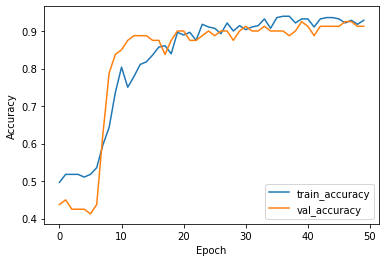

In [31]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.savefig("DeepFig.pdf",dpi=1200)